## 1.构建非线性数据集

In [4]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt


def standarlization(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std


def make_nonlinear_reg_data():
    np.random.seed(10)
    num_points = 100
    x = np.linspace(-5, 5, num_points).reshape(-1, 1)
    y = x ** 2 + np.random.randn(num_points).reshape(-1, 1)
    x = standarlization(x)
    return x, y

## 2.构建预测函数和评价指标

In [5]:
def MSE(y, y_pre):
    return np.mean((y - y_pre) ** 2)


def prediction(X, W, bias):
    return np.matmul(X, W) + bias  # [m,n] @ [n,1] = [m,1]

## 3.定义损失函数和梯度下降

In [6]:
def cost_function(X, y, W, bias):
    m, n = X.shape
    y_hat = prediction(X, W, bias)
    return 0.5 * (1 / m) * np.sum((y - y_hat) ** 2)


def gradient_descent(X, y, W, bias, alpha):
    m, n = X.shape
    y_hat = prediction(X, W, bias)
    grad_w = -(1 / m) * np.matmul(X.T, (y - y_hat))  # [n,m] @ [m,1] = [n,1]
    grad_b = -(1 / m) * np.sum(y - y_hat)  # 求解梯度
    W = W - alpha * grad_w  # 梯度下降
    bias = bias - alpha * grad_b
    return W, bias

## 4.模型训练

In [7]:
def train(X, y, ite=200):
    m, n = X.shape  # 506,13
    W = np.random.randn(n, 1)
    b = 0.1
    alpha = 0.2
    costs = []
    for i in range(ite):
        J = cost_function(X, y, W, b)
        costs.append(J)
        W, b = gradient_descent(X, y, W, b, alpha)
    y_pre = prediction(X, W, b)
    print("MSE: ", MSE(y, y_pre))
    return y_pre

## 5.运行结果

MSE:  0.9263748899645797


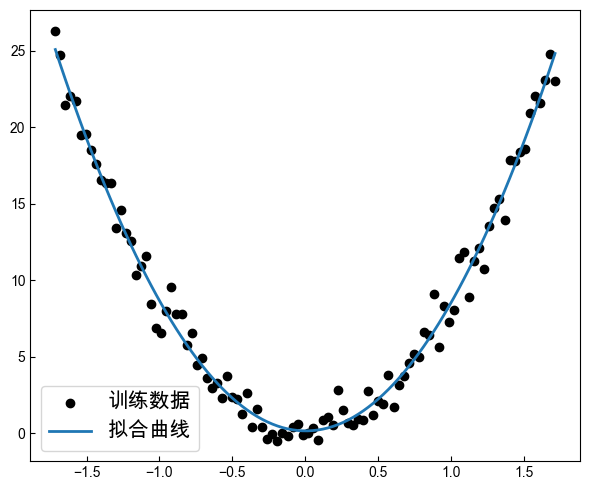

In [8]:

if __name__ == '__main__':
    x, y = make_nonlinear_reg_data()
    poly = PolynomialFeatures(degree=2, include_bias=False)
    x_pol = poly.fit_transform(x)
    y_pre = train(x_pol, y)
    plt.figure(1, figsize=(6, 5))
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    plt.scatter(x, y, label='训练数据', c='black')
    plt.plot(x, y_pre, linewidth=2, label='拟合曲线')
    # plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体 # windows
    plt.legend(fontsize=15)
    plt.tight_layout()  # 调整子图间距
    plt.show()